In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import plotnine as p9

In [2]:
p9.options.dpi=300

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype']='none'

In [5]:
bulk_T0_count=pd.read_csv(ProjectData_dir+'Bulk_validCount.csv',header=0)

In [6]:
libC_whitelist=pd.read_csv(libC_construct_sequence)
#read the whitelist just so I can match lineage sequences with lineage names

/local/18336806/ipykernel_6608/964456641.py:1: DtypeWarning: Columns (0,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.


In [7]:
libC_whitelist.columns=['LineageName','SubLibrary','42ntBC','42ntBCrevcomp','LibInsertSequence']

In [8]:
libC_whitelist['bulk_R1_30nt']=libC_whitelist['42ntBC'].str[12:42]

In [9]:
bulk_T0_count=bulk_T0_count.merge(libC_whitelist[['LineageName','bulk_R1_30nt']],how='left',left_on='bulk_R1_30nt',right_on='bulk_R1_30nt')

In [10]:
T0_GEX_adata=sc.read_h5ad(ProjectData_dir+'/T0_OAK/Anndata/OAK1to20_GEXwGuide_clustered.h5ad')

In [11]:
df_Rho=pd.DataFrame(columns=['downsample_percent','sample_size', 'Rho'])
for i in range (10): #subsample with 10% increment at each step
    for j in range(10): #repeat 10 times 
        n=round((i+1)/10*34829) #34829 cells with lineage assigned
        df_T0_down=T0_GEX_adata.obs.sample(n,replace=False)
        df_sc_counts=df_T0_down.Lineage_assigned.value_counts().rename_axis('LineageID').reset_index(name='NumCells')
        df_bulk_sc=df_sc_counts.merge(bulk_T0_count,how='outer',left_on='LineageID',right_on='LineageName')
        df_Rho.loc[i*10+j,'downsample_percent']=(i+1)/10
        df_Rho.loc[i*10+j,'sample_size']=(i+1)/10*3700*20 #3700*20 cells sequenced in total
        df_Rho.loc[i*10+j,'Rho']=df_bulk_sc[['NumCells','ReadCount']].corr(method="spearman").loc['NumCells','ReadCount']

In [12]:
df_Rho=df_Rho.astype(dtype={'downsample_percent':'float64','sample_size':'int64','Rho':'float64'})

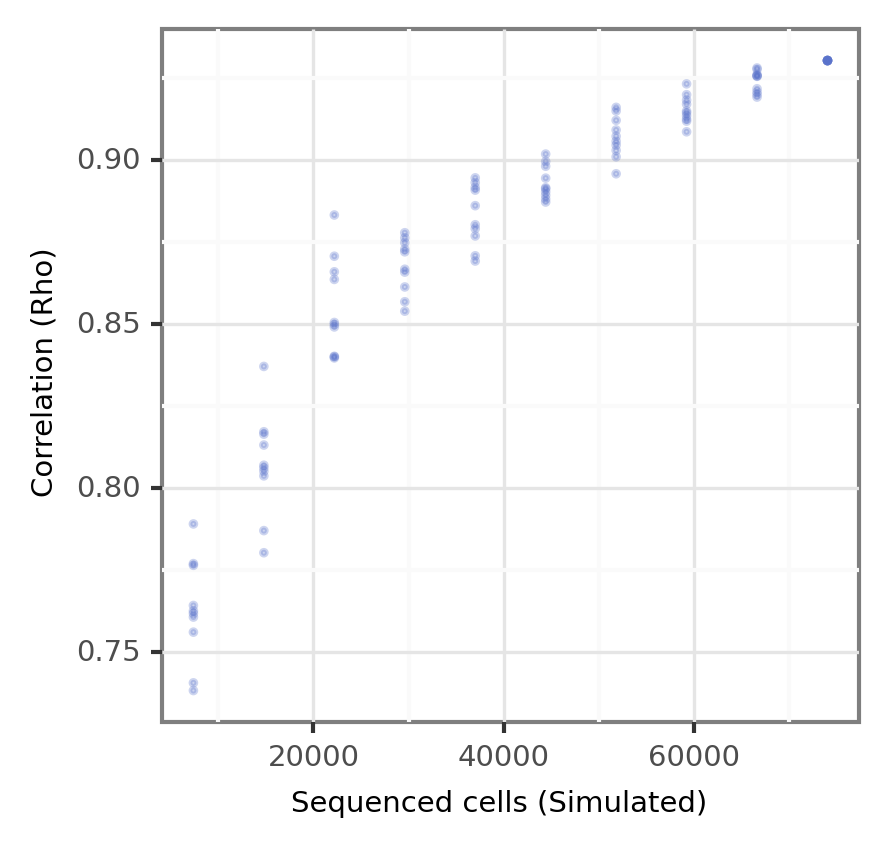

<ggplot: (2932441228409)>

In [13]:
plot=p9.ggplot(data=df_Rho,
           mapping=p9.aes(x='sample_size',
                          y='Rho',
                         ),
              )
plot+p9.geom_point(alpha=0.3,size=0.3,color='#5972CB') \
+ p9.themes.theme_bw() \
+ p9.theme(text=p9.element_text(size=7)) \
+ p9.xlab('Sequenced cells (Simulated)') \
+ p9.ylab('Correlation (Rho)') \
+ p9.theme(figure_size=(3,3)) # 3 inch

In [14]:
df_Rho['sample_size_cat']=pd.Categorical(df_Rho.sample_size)

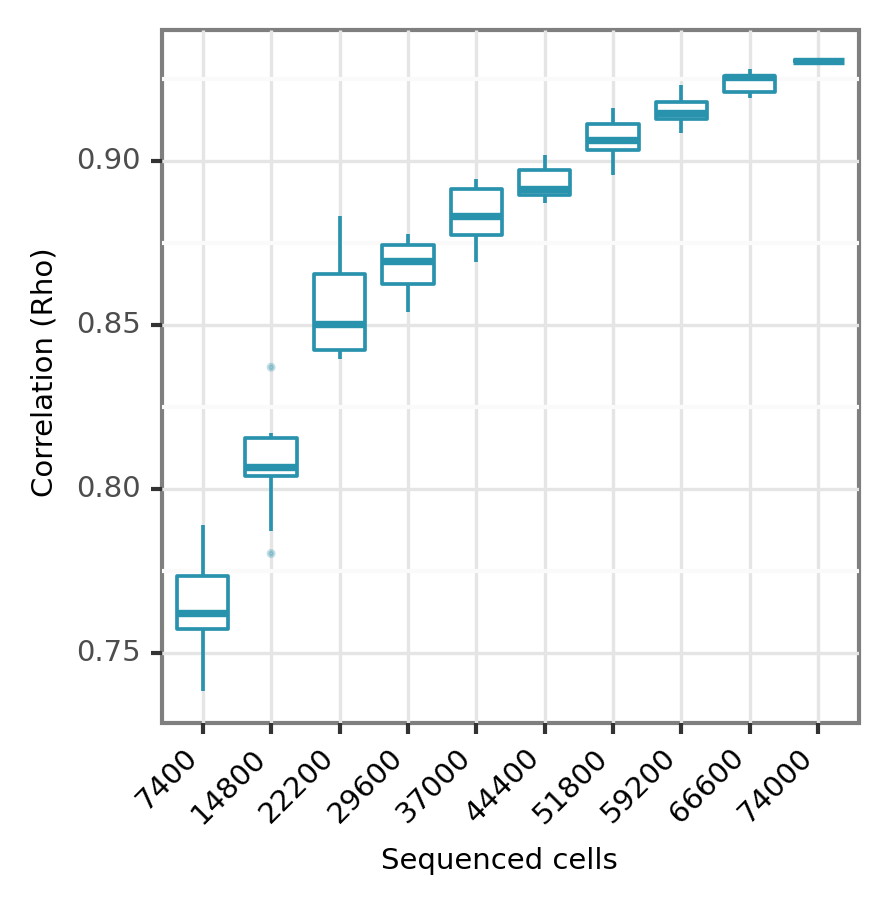

<ggplot: (2932043116066)>

In [15]:
plot=p9.ggplot(data=df_Rho, 
           mapping=p9.aes(x='sample_size_cat',
                          y='Rho',
                         ),
              )
plot+p9.geom_boxplot(outlier_alpha=0.3,outlier_size=0.2, show_legend=False,color='#2992AD') \
+ p9.themes.theme_bw() \
+ p9.theme(text=p9.element_text(size=7)) \
+ p9.xlab('Sequenced cells') \
+ p9.ylab('Correlation (Rho)') \
+ p9.theme(axis_text_x=p9.element_text(colour="black",angle = 45, hjust = 1)) \
+ p9.theme(figure_size=(3,3)) # 3 inch

In [16]:
plot=p9.ggplot(data=df_Rho, 
           mapping=p9.aes(x='sample_size_cat',
                          y='Rho',
                         ),
              )
plotsave=plot+p9.geom_boxplot(outlier_alpha=0.3,outlier_size=0.2, show_legend=False,color='#2992AD') \
+ p9.themes.theme_bw() \
+ p9.theme(text=p9.element_text(size=7)) \
+ p9.xlab('Sequenced cells') \
+ p9.ylab('Correlation (Rho)') \
+ p9.theme(axis_text_x=p9.element_text(colour="black",angle = 45, hjust = 1)) \
+ p9.theme(figure_size=(3,3)) # 3 inch

plotsave.save('DownsampleCellRho.svg',height=3,width=3,format='svg',dpi=300) 

/gstore/home/wub31/.conda/envs/py38_Scanpy_expanded/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 3 x 3 in image.
/gstore/home/wub31/.conda/envs/py38_Scanpy_expanded/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: DownsampleCellRho.svg
